In [1]:
import sys , ROOT
sys.path.insert(0, '/uboone/app/users/ecohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/GBDTprotons/GBDTprotonPackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/mySoftwarePackage/mac')
import pylab
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from root_numpy import tree2array 
import seaborn as sns
from ROOT import TPlots
import Initiation as init
import my_tools
dirname = init.createnewdir()
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
DataName = "MC_BNB"
main_path = "/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna"
anafiles_path = main_path + "/TracksAnaFiles"
ana = TPlots( anafiles_path + "/Tracks_" + DataName + "_AnalysisTrees.root" , 'TracksTree' )

In [3]:
branches=['tracks.dEdx_Y','tracks.track_length_Y']
def read_tree(MCpdgCut='MCpdgCode==2212',label='protons'):
    print 'processing %s data'%label
    ana_arr = tree2array(ana.GetTree(),
                         selection='tracks.dEdx_Y>0.5 && tracks.dEdx_Y>0.5 && (%s)'%MCpdgCut,
                         branches=branches)
    length = np.concatenate(ana_arr['tracks.track_length_Y']).ravel().tolist()
    dEdx = np.concatenate(ana_arr['tracks.dEdx_Y']).ravel().tolist()
    df = pd.DataFrame(data={'residual-range':length,'dE/dx':dEdx})
    print 'read %s data'%label
    return df

In [5]:
df_p = read_tree(MCpdgCut='MCpdgCode==2212',label='protons')
df_mu = read_tree(MCpdgCut='MCpdgCode==13 || MCpdgCode==-13',label='muon')
df_pi = read_tree(MCpdgCut='MCpdgCode==211 || MCpdgCode==-211 || MCpdgCode==111',label='pions')
df_em = read_tree(MCpdgCut='MCpdgCode==11 || MCpdgCode==-11 || MCpdgCode==22',label='em')

processing protons data
read protons data
processing muon data
read muon data
processing pions data
read pions data
processing em data
read em data


In [52]:
Nmax = 600000

processing plot for  proton
data['dE/dx'].min(): 0.500006854534
data['residual-range'].min(): 0.500005245209
done generating plot for  proton
processing plot for  muon
data['dE/dx'].min(): 0.500002801418
data['residual-range'].min(): 0.500002682209
done generating plot for  muon
processing plot for  pion
data['dE/dx'].min(): 0.500009477139
data['residual-range'].min(): 0.500017464161
done generating plot for  pion
processing plot for  em
data['dE/dx'].min(): 0.500003576279
data['residual-range'].min(): 0.500001430511
done generating plot for  em


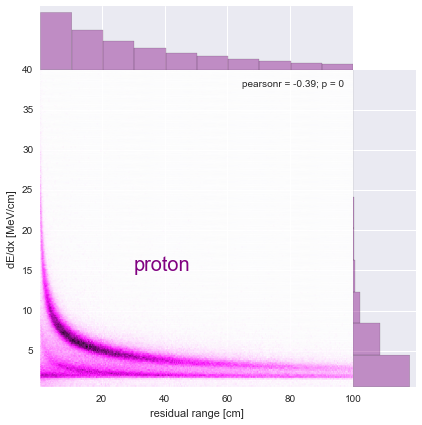

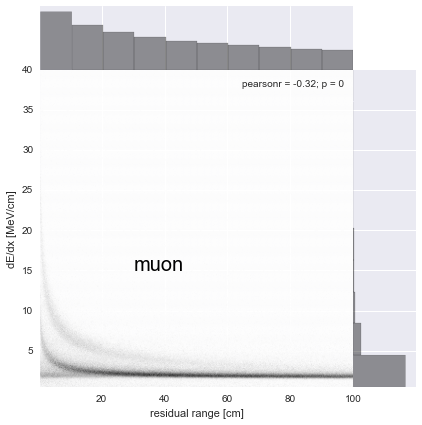

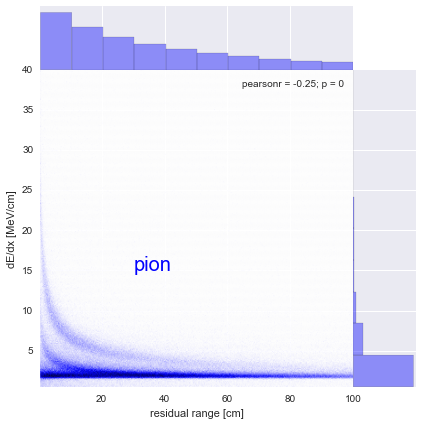

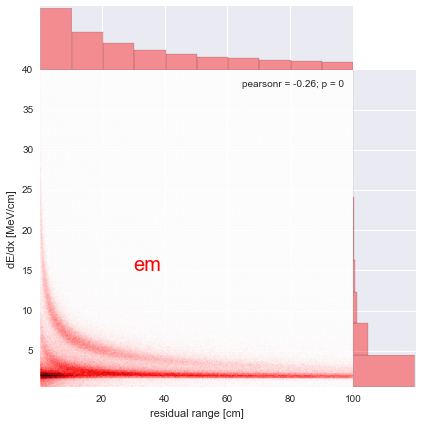

In [53]:
labels = ['proton' , 'muon', 'pion' , 'em' ]
colors = ['purple' , 'black', 'blue', 'red' ]
for df , color, label in zip([df_p,df_mu,df_pi,df_em],colors,labels):
    print 'processing plot for ',label
    data = df[df['residual-range']<100]
    data = data[data['residual-range']>0.5]
    data = data[data['dE/dx']>0.5]
    data = data[data['dE/dx']<40]
    print "data['dE/dx'].min():",data['dE/dx'].min()
    print "data['residual-range'].min():",data['residual-range'].min()

    data = data[0:Nmax]
    g=sns.jointplot("residual-range", "dE/dx", data=data,kind="hex", space=0, color=color,
                   marginal_kws=dict(bins=10))
    ax = g.ax_joint
    ax.text(30,15,label,color=color,fontsize=20)
    g.set_axis_labels ("residual range [cm]", "dE/dx [MeV/cm]")
    g.savefig('/Users/erezcohen/Desktop/%s.pdf'%label)
    print 'done generating plot for ',label
